# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
Dataset ini disediakan oleh Olist, perusahaan e-commerce terbesar di Brasil yang memfasilitasi bisnis kecil. Olist berperan sebagai penghubung antara toko-toko kecil dengan berbagai marketplace, sehingga mempermudah mereka untuk menjual produk secara online. Produk yang dijual langsung dikirim dari toko ke konsumen melalui mitra logistik Olist. Selebihnya tentang Olist dapat mengunjungi [Website Olist](www.olist.com).

- **Nama:** Naurahhana Firdaustsabita F P P
- **Email:** naurahhana@student.telkomuniversity.ac.id
- **ID Dicoding:** naurahhanafp

## Menentukan Pertanyaan Bisnis

Fokus analisis data yang dilakukan pada proyek ini adalah **menganalisis performa pengiriman order** Olist sehingga dataset yang digunakan hanya 2, yaitu *olist_orders_dataset.csv* dan *olist_order_reviews_dataset.csv*. Pertanyaan bisnis yang dirumuskan untuk analisis data ini adalah:
1. Bagaimana tren jumlah order tiap tahun?
2. Bagaimana performa pengiriman pesanan tiap tahun?
3. Berapa persentase order yang berhasil dikirim tepat waktu?
4. Bagaimana hubungan antara status pengiriman order dengan rating ulasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Dataset yang digunakan adalah *olist_orders_dataset.csv* dan *olist_order_reviews_dataset.csv*.

#### Memuat tabel orders

In [2]:
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dapat melihat **tren jumlah order** dengan kolom *order_id* berdasarkan kolom *order_purchase_timestamp*
- Dapat mengidentifikasi barang yang **datang terlambat** dan **tepat waktu** dengan melakukan kalkulasi untuk kolom *order_estimated_delivery_date* dan *order_delivered_customer_date*
- Dapat menghitung **lama waktu pengiriman** dengan melakukan kalkulasi untuk kolom *order_delivered_customer_date* dan *order_purchase_timestamp*

#### Memuat tabel orders review

In [3]:
df_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:** 

Mencari **hubungan kedatangan order dengan review customer** menggunakan tabel *df_orders* dan *df_review*

### Assessing Data
Menilai data *df_orders* dan *df_reviews* dengan melihat tipe data, duplikasi, dan banyaknya nilai null.

#### Menilai data df_orders

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
print("Jumlah duplikasi: ", df_orders.duplicated().sum())
df_orders.isna().sum()

Jumlah duplikasi:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Tipe data kolom *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date* seharusnya **datetime**
- Terdapat kolom yang **null** karena disesuaikan dengan *order_status*

#### Menilai data df_reviews

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [7]:
print("Jumlah duplikasi: ", df_reviews.duplicated().sum())
df_reviews.isna().sum()

Jumlah duplikasi:  0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight**
- Kolom *review_creation_date* dan *review_answer_timestamp* seharusnya bertipe **datetime**.
- Tidak semua customer memberikan komentar untuk review.

### Cleaning Data
Pembersihan data dilakukan sesuai penilaian yang telah dilakukan di tahapan assesing data.

#### Membersihkan data df_orders
Mengubah tipe data kolom *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date* menjadi **datetime**

In [8]:
datetime_columns_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
df_orders[datetime_columns_orders] = df_orders[datetime_columns_orders].apply(pd.to_datetime)

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan data df_reviews
Mengubah tipe data kolom *review_creation_date* dan *review_answer_timestamp* menjadi **datetime**

In [9]:
datetime_columns_reviews = ["review_creation_date", "review_answer_timestamp"]
df_reviews[datetime_columns_reviews] = df_reviews[datetime_columns_reviews].apply(pd.to_datetime)

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### Eksplorasi data df_orders

In [10]:
df_orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Melihat tren order dengan membuat kolom untuk hari, tanggal, bulan, tahun, dan waktu dari kolom *order_purchase_timestamp*.

In [11]:
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].dt.day_name()           # Nama hari
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].dt.day                 # Tanggal
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.month_name()       # Nama bulan
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.year                # Tahun
df_orders['order_purchase_time'] = df_orders['order_purchase_timestamp'].dt.time                # Waktu

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39


Membuat pivot table untuk melihat banyak order berdasarkan tahun.

In [12]:
df_orders.groupby(by="order_purchase_year").agg({
    "order_id" : "nunique"
})

,order_id
order_purchase_year,
2016,329
2017,45101
2018,54011


Membuat pivot table untuk melihat banyak order berdasarkan bulan dan tahun.

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_orders['order_purchase_month'] = pd.Categorical(df_orders['order_purchase_month'], categories=month_order, ordered=True)

df_orders.groupby(by=["order_purchase_year", "order_purchase_month"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .query('order_id > 0')

,order_purchase_year,order_purchase_month,order_id
8,2016,September,4
9,2016,October,324
11,2016,December,1
12,2017,January,800
13,2017,February,1780
14,2017,March,2682
15,2017,April,2404
16,2017,May,3700
17,2017,June,3245
18,2017,July,4026


Agar datanya konsisten, data yang akan dianalisis adalah data pada bulan Januari 2017 hingga Agustus 2018.

Membuat pivot table untuk melihat banyak order berdasarkan statusnya.

In [14]:
df_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Membuat kolom baru delivery_status untuk memuat status late (terlambat) dan on time (tepat waktu) dengan melakukan kalkulasi kolom *order_estimated_delivery_date* dengan kolom *order_delivered_customer_date*.

In [15]:
delivery_status = (df_orders["order_estimated_delivery_date"] - df_orders["order_delivered_customer_date"]).dt.days
df_orders['delivery_status'] = delivery_status.apply(lambda x: 'On Time' if x > 0 else 'Late')

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39,On Time


Membuat pivot table untuk melihat banyak order berdasarkan status delivery.

In [16]:
df_orders.groupby(by="delivery_status").agg({
    "order_id" : "nunique"
})

,order_id
delivery_status,
Late,12254
On Time,87187


**Insight:**
- Setiap tahun, order barang meningkat dimana 2018 terdapat 54.011 order.
- Status delivered merupakan status pengiriman yang paling tinggi.
- Ada 12.254 order yang mengalami keterlambatan.

In [17]:
df_orders["length_of_delivery_time"] = (df_orders["order_estimated_delivery_date"] - df_orders["order_delivered_customer_date"]).dt.days
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,order_purchase_month,order_purchase_year,order_purchase_time,delivery_status,length_of_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,October,2017,10:56:33,On Time,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,July,2018,20:41:37,On Time,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,August,2018,08:38:49,On Time,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,November,2017,19:28:06,On Time,12.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,February,2018,21:18:39,On Time,9.0


In [18]:
#rata rata waktu pengiriman
df_orders["length_of_delivery_time"].mean()

10.876881296902857

### Eksplorasi data df_reviews

In [19]:
df_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Membuat pivot table untuk melihat banyak order berdasarkan review score.

In [20]:
df_reviews.groupby(by="review_score").agg({
    "order_id" : "nunique"
})

,order_id
review_score,
1,11393
2,3148
3,8160
4,19098
5,57076


**Insight:**
Untuk melihat hubungan antara rating ulasan (review_score) dengan status kedatangan order (delivery_status), perlu menggabungkan *df_orders* dan *df_reviews*.

### Eksplorasi data df_orders dan df_reviews

Menggabungkan (merge) *df_orders* dan *df_reviews*.

In [21]:
df_order_review = pd.merge(
    left=df_orders,
    right=df_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df_order_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,...,order_purchase_year,order_purchase_time,delivery_status,length_of_delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,...,2017,10:56:33,On Time,7.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,...,2018,20:41:37,On Time,5.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,...,2018,08:38:49,On Time,17.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,...,2017,19:28:06,On Time,12.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,...,2018,21:18:39,On Time,9.0,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


Melakukan filter untuk *df_order_review* berdasarkan *df_year_month_orders* agar datanya konsisten. Data yang akan dianalisis adalah data pada bulan Januari 2017 hingga Agustus 2018.

In [22]:
df_order_review_filtered = df_order_review[
    ((df_order_review['order_purchase_year'] == 2017) & (df_order_review['order_purchase_month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))) |
    ((df_order_review['order_purchase_year'] == 2018) & (df_order_review['order_purchase_month'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])))
]
df_order_review_filtered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day,order_purchase_date,...,order_purchase_year,order_purchase_time,delivery_status,length_of_delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Monday,2,...,2017,10:56:33,On Time,7.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tuesday,24,...,2018,20:41:37,On Time,5.0,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wednesday,8,...,2018,08:38:49,On Time,17.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Saturday,18,...,2017,19:28:06,On Time,12.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tuesday,13,...,2018,21:18:39,On Time,9.0,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17,2018-02-18 13:02:51


Membuat pivot table untuk melihat banyaknya order berdasarkan status pengiriman dan rating ulasan.

In [23]:
df_order_review_filtered.groupby(by=["review_score", "delivery_status"]).agg({
    "order_id" : "nunique"
})

order_id
review_score delivery_status          
1.0          Late                 5601
             On Time              5692
2.0          Late                  861
             On Time              2275
3.0          Late                 1239
             On Time              6898
4.0          Late                 1440
             On Time             17606
5.0          Late                 2772
             On Time             54148

**Insight:**
- Terdapat 54.148 review order dengan score 5 
- Status pengiriman terlambat berdampak terhadap review score.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah order tiap tahun?
Membuat dataframe baru untuk menampung informasi banyak order berdasarkan bulan dan tahun order dari dataframe *df_order_review_filtered*.

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_order_review_filtered['order_purchase_month'] = pd.Categorical(df_order_review_filtered['order_purchase_month'], categories=month_order, ordered=True)

df_year_month_order = df_order_review_filtered.groupby(by=["order_purchase_year", "order_purchase_month"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .rename(columns={"order_id": "order_count"}) \
    .query('order_count > 0')

df_year_month_order

C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_10400\736237272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order_review_filtered['order_purchase_month'] = pd.Categorical(df_order_review_filtered['order_purchase_month'], categories=month_order, ordered=True)


,order_purchase_year,order_purchase_month,order_count
0,2017,January,800
1,2017,February,1780
2,2017,March,2682
3,2017,April,2404
4,2017,May,3700
5,2017,June,3245
6,2017,July,4026
7,2017,August,4331
8,2017,September,4285
9,2017,October,4631


Membuat line chart berdasarkan tahunnya dengan menggunakan library *seaborn*.

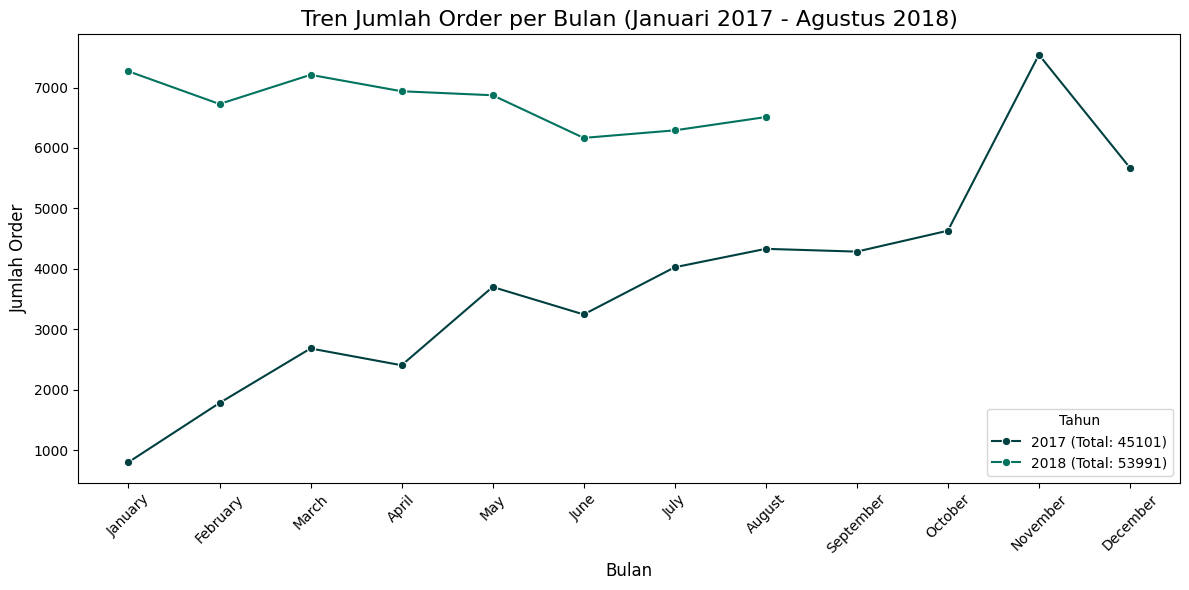

In [25]:
# Mengitung total pesanan untuk setiap tahun
total_orders_2017 = df_year_month_order[df_year_month_order["order_purchase_year"] == 2017]["order_count"].sum()
total_orders_2018 = df_year_month_order[df_year_month_order["order_purchase_year"] == 2018]["order_count"].sum()

plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    x="order_purchase_month",   #sumbu x
    y="order_count",            #sumbu y
    hue="order_purchase_year",
    data=df_year_month_order, 
    marker="o", 
    palette=["#014040", "#02735E"]
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles, # objek grafis dari legend (misalnya, garis).
    labels=[f"2017 (Total: {total_orders_2017})", f"2018 (Total: {total_orders_2018})"], 
    title="Tahun"
)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.title("Tren Jumlah Order per Bulan (Januari 2017 - Agustus 2018)", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
Jumlah total order pada tahun 2018 (53.991) lebih tinggi dibandingkan tahun 2017 (45.101).

### Pertanyaan 2: Bagaimana performa pengiriman pesanan tiap tahun?
Membuat dataframe baru untuk menampung status pengiriman order dari *df_order_review_filtered*.

In [26]:
df_delivery_performa = df_order_review_filtered.groupby(by=["order_purchase_year", "order_purchase_month", "delivery_status"]).order_id.nunique().reset_index() \
    .sort_values(by=["order_purchase_year", "order_purchase_month"]).reset_index(drop=True) \
    .rename(columns={"order_id": "order_count"}) \
    .query('order_count > 0')

df_delivery_performa

,order_purchase_year,order_purchase_month,delivery_status,order_count
0,2017,January,Late,73
1,2017,January,On Time,727
2,2017,February,Late,183
3,2017,February,On Time,1597
4,2017,March,Late,293
5,2017,March,On Time,2389
6,2017,April,Late,306
7,2017,April,On Time,2098
8,2017,May,Late,305
9,2017,May,On Time,3395


Membuat 2 canvas untuk tahun 2017 dan 2018

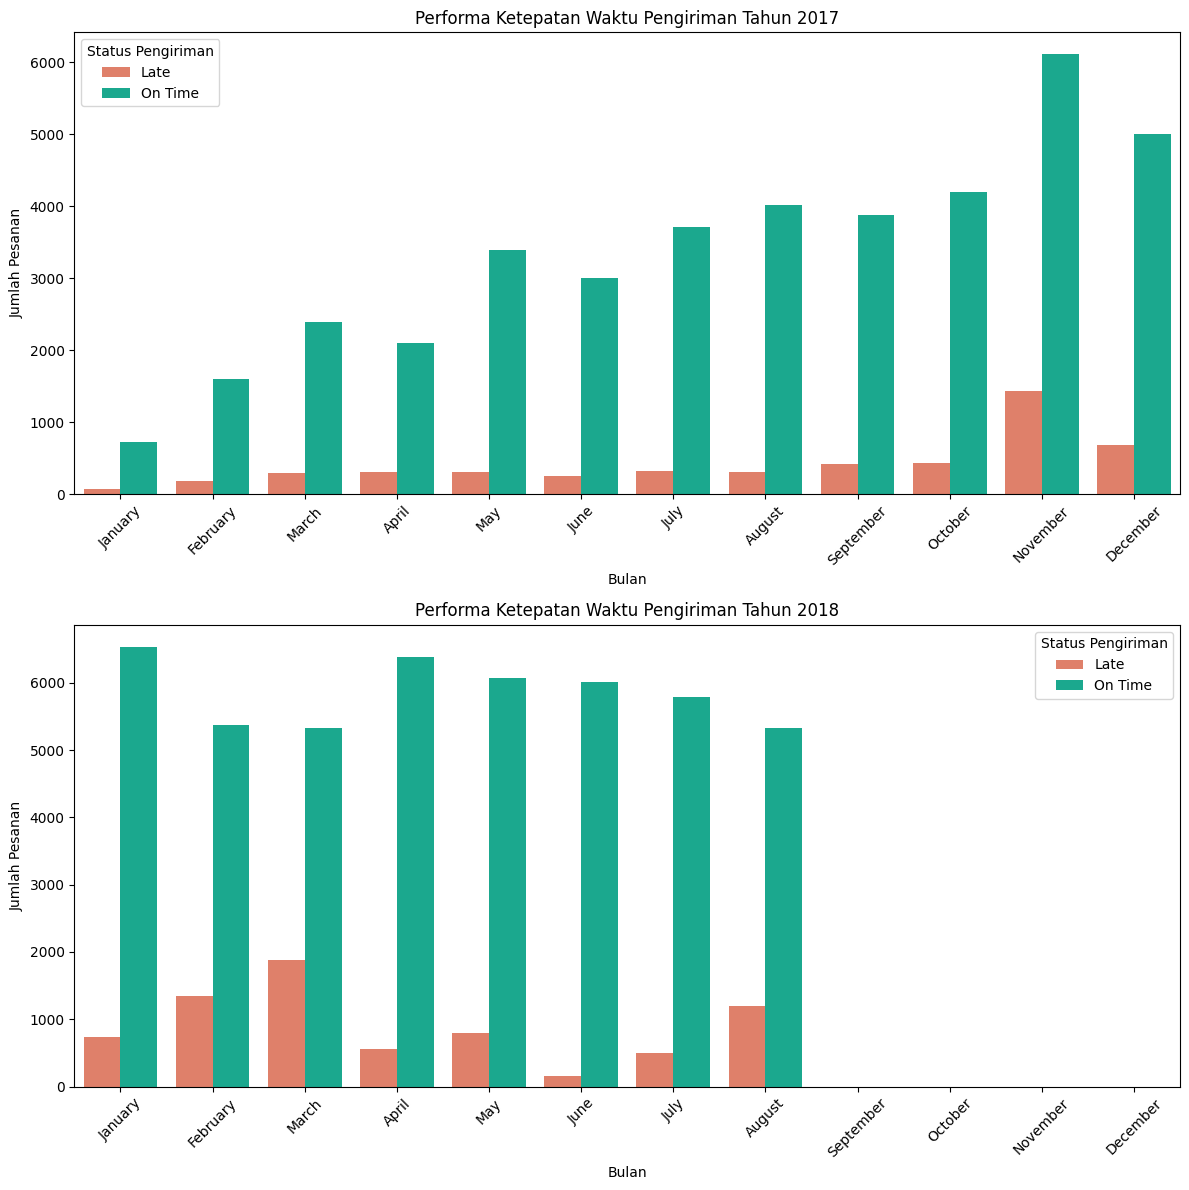

In [27]:
plt.figure(figsize=(12, 12))

# Membuat subplot untuk setiap tahun
for year in df_delivery_performa["order_purchase_year"].unique():
    # membuat dua baris subplot (satu untuk tahun 2017 dan satu untuk tahun 2018)
    plt.subplot(2, 1, year - 2016) # plt.subplot(nrows, ncols, index)
    sns.barplot(data=df_delivery_performa[df_delivery_performa["order_purchase_year"] == year], 
                 x="order_purchase_month", 
                 y="order_count", 
                 hue="delivery_status", 
                 palette=["#F27457", "#04BF9D"])
    
    plt.title(f"Performa Ketepatan Waktu Pengiriman Tahun {year}")
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Pesanan")
    plt.xticks(rotation=45)
    plt.legend(title="Status Pengiriman")

# Adjust layout
plt.tight_layout()
plt.show()

**Insight:** Pengiriman pesanan yang terlambat lebih banyak di tahun 2018.

### Pertanyaan 3: Berapa persentase order yang berhasil dikirim tepat waktu?
Membuat pie chart untuk mengetahui presentase order berdasarkan status pengiriman dengan library *matplotlib* menggunakan *df_delivery_performa*.

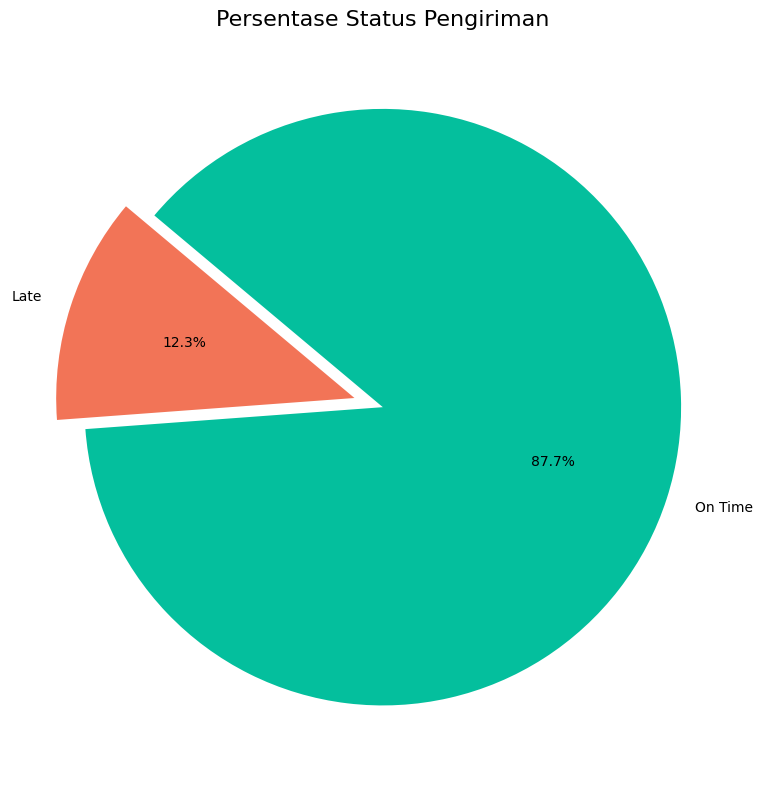

In [28]:
# Membuat dataframe untuk memuat jumlah delivery_status berdasarkan order_count
df_delivery_presentase = df_delivery_performa.groupby('delivery_status')['order_count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    df_delivery_presentase, 
    explode= (0.1, 0) , 
    labels= df_delivery_presentase.index, 
    colors= ["#F27457", "#04BF9D"], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Persentase Status Pengiriman", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:** Terdapat 12.3% pengiriman order yang terlambat.

### Pertanyaan 4: Bagaimana hubungan antara status pegiriman order dengan rating ulasan pelanggan?

Membuat dataframe baru untuk memuat banyak order berdasarkan status pengiriman dan rating ulasan dari *df_order_review_filtered*.

In [29]:
df_order_score = df_order_review_filtered.groupby(by=["review_score", "delivery_status"]).agg({
    "order_id" : "nunique"
})
df_order_score.rename(columns={
    "order_id": "order_count"
}, inplace=True)
df_order_score = df_order_score.reset_index()
df_order_score

,review_score,delivery_status,order_count
0,1.0,Late,5601
1,1.0,On Time,5692
2,2.0,Late,861
3,2.0,On Time,2275
4,3.0,Late,1239
5,3.0,On Time,6898
6,4.0,Late,1440
7,4.0,On Time,17606
8,5.0,Late,2772
9,5.0,On Time,54148


Membuat bar chart menggunakan library *seaborn*.

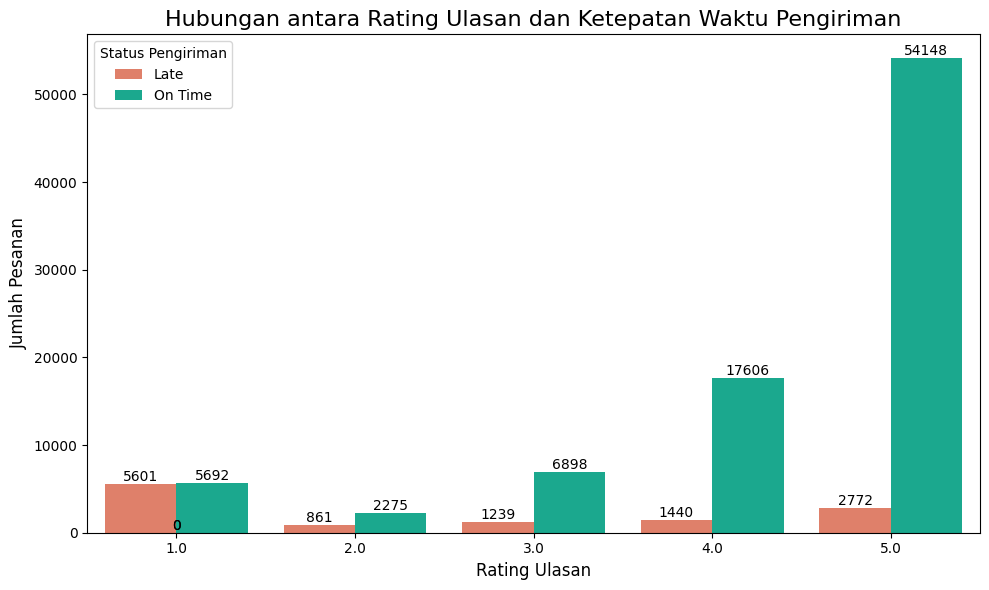

In [30]:
# Membuat plot grouped bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="review_score", 
    y="order_count", 
    hue="delivery_status", 
    data=df_order_score,
    palette=["#F27457", "#04BF9D"]  # Pastikan jumlah warna sesuai dengan kategori
)

# Menambahkan label pada setiap bar
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(
        f'{int(height)}',  # Label nilai
        (patch.get_x() + patch.get_width() / 2, height),  # Posisi label
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10
    )

# Menambahkan label dan judul
plt.xlabel('Rating Ulasan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.title('Hubungan antara Rating Ulasan dan Ketepatan Waktu Pengiriman', fontsize=16)
plt.legend(title='Status Pengiriman')
plt.tight_layout()
plt.show()


**Insight:** Terdapat 53.297 review bernilai 5 untuk pengiriman yang ontime. Namun, terdapat 5.661 review bernilai 1 untuk pengiriman terlambat yang sebenernya tidak jauh berbeda dengan total 5.732 review bernilai 1 untuk pengiriman tepat waktu.

## Conclusion

1. **Conclution pertanyaan 1: Bagaimana tren jumlah pesanan tiap tahun?**

Secara umum, bisnis mengalami pertumbuhan dari tahun 2017 ke 2018, ditunjukkan oleh peningkatan jumlah pesanan total.

2. **Conclution pertanyaan 2: Bagaimana performa pengiriman pesanan tiap tahun?**

Jumlah pengiriman yang tepat waktu (on time) lebih dominan dibandingkan pengiriman yang terlambat (late) baik di tahun 2017 maupun 2018. Seiring peningkatan jumlah pesanan di tahun 2018, ternyata pengiriman terlambat juga meningkat di tahun 2018.

3. **Conclution pertanyaan 3: Berapa persentase pesanan yang berhasil dikirim tepat waktu?**

Secara keseluruhan, kinerja pengiriman produk berjalan cukup baik. Ini terlihat dari persentase pengiriman yang tepat waktu (on time) mencapai 87,7%. Meskipun persentasenya lebih kecil, yaitu 12,3%, adanya pengiriman yang terlambat tetap perlu menjadi perhatian. Keterlambatan pengiriman dapat menjadi penyebab ketidakpuasan pelanggan dan berpotensi merusak reputasi perusahaan. 

4. **Conclution pertanyaan 3: Bagaimana hubungan antara status pengiriman pesanan dengan rating ulasan pelanggan?**

Status pengiriman dapat memengaruhi skor review untuk order. Terdapat 53.297 review bernilai 5 untuk pengiriman yang ontime. Namun, terdapat 5.661 review bernilai 1 untuk pengiriman terlambat yang sebenernya tidak jauh berbeda dengan total 5.732 review bernilai 1 untuk pengiriman tepat waktu. Pelanggan dapat menulis komentar untuk setiap review yang diberikan. Untuk mengetahui faktor lain yang mempengaruhi skor review setiap order, kita perlu memperhatikan komentar-komentar tersebut terutama ketika mendapatkan skor review yang rendah. Hal ini bertujuan untuk mengoptimalkan waktu pengiriman.